# Parte 1

In [46]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

## Punto 1.1

In [2]:
dataset = pd.read_csv('bdastudents.csv', sep = ';')
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,5,3,3,1,1,3,4,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,1,1
3,GP,F,15,U,1,T,4,2,health,services,...,3,2,2,1,1,5,2,2,1,2
4,GP,F,16,U,1,T,3,3,other,other,...,4,3,2,1,2,5,4,0,1,1


In [3]:
dataset.shape

(1044, 32)

In [4]:
dataset.dtypes

school        object
sex           object
age            int64
address       object
famsize        int64
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
dataset.corr()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.013290,-0.130196,-0.138521,0.049216,-0.007870,0.282364,-0.202824,-0.116904,-0.027917,...,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.056037,-0.051560,-0.064231
famsize,-0.013290,1.000000,0.025556,0.047290,-0.031550,0.035109,0.044589,0.045552,0.067340,0.028290,...,0.005328,0.007249,-0.005889,-0.075646,-0.090019,0.009147,-0.018284,-0.044043,-0.047472,-0.061796
Medu,-0.130196,0.025556,1.000000,0.642063,-0.238181,0.090616,-0.187769,-0.023618,0.143063,0.161349,...,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.181216,0.172252,0.177026
Fedu,-0.138521,0.047290,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.032450,0.153342,0.118897,...,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.145596,0.123545,0.125433
traveltime,0.049216,-0.031550,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.033940,-0.026117,-0.083679,...,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.077966,-0.080663,-0.070310
studytime,-0.007870,0.035109,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.070598,0.143858,0.105704,...,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.184052,0.149821,0.139113
failures,0.282364,0.044589,-0.187769,-0.191390,0.087177,-0.152024,1.000000,0.002483,-0.027574,-0.036389,...,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.253112,-0.237695,-0.253979
schoolsup,-0.202824,0.045552,-0.023618,0.032450,-0.033940,0.070598,0.002483,1.000000,0.086945,0.021606,...,-0.007634,-0.026126,-0.051227,-0.025852,-0.093517,0.000785,-0.009104,-0.092131,-0.099547,-0.118545
famsup,-0.116904,0.067340,0.143063,0.153342,-0.026117,0.143858,-0.027574,0.086945,1.000000,0.169424,...,0.002261,0.006227,0.005252,-0.022275,-0.073596,0.022668,0.031267,0.000694,-0.010275,-0.001554
paid,-0.027917,0.028290,0.161349,0.118897,-0.083679,0.105704,-0.036389,0.021606,0.169424,1.000000,...,0.015404,-0.034747,-0.012943,0.041919,0.042812,-0.009043,0.070505,0.004272,0.009709,-0.036541


In [6]:
num_istanze = dataset.shape[0]
num_istanze

1044

In [7]:
values_sex = dataset['sex'].value_counts()
sex_F = values_sex['F']
sex_M = values_sex['M']
sex_M, sex_F

(453, 591)

In [8]:
values_G1 = dataset['G1'].value_counts()
G1_zero = values_G1[0]
G1_one = values_G1[1]
G1_two = values_G1[2]
values_G1

1    848
2    146
0     50
Name: G1, dtype: int64

In [9]:
values_G2 = dataset['G2'].value_counts()
G2_zero = values_G2[0]
G2_one = values_G2[1]
G2_two = values_G2[2]
values_G2

1    819
2    165
0     60
Name: G2, dtype: int64

In [10]:
values_G3 = dataset['G3'].value_counts()
G3_zero = values_G3[0]
G3_one = values_G3[1]
G3_two = values_G3[2]
values_G3

1    759
2    204
0     81
Name: G3, dtype: int64

In [11]:
dataset['GRate'] = dataset['G2'] - dataset['G1']
dataset['GRate'].value_counts()

 0    915
 1     69
-1     60
Name: GRate, dtype: int64

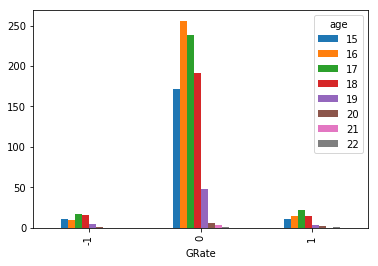

In [12]:
grate_age = dataset.groupby(['GRate', 'age']).size().unstack()
grate_age.plot(kind = 'bar')
plt.show()

In [13]:
valuate_g3 = dataset.groupby('sex')['G3'].mean()
valuate_g3.round(decimals = 3)

sex
F    1.124
M    1.110
Name: G3, dtype: float64

In [14]:
valuate_school = dataset.groupby(['sex', 'school'])['G3'].mean().unstack()
valuate_school

school,GP,MS
sex,,
F,1.128571,1.111111
M,1.153409,0.960396


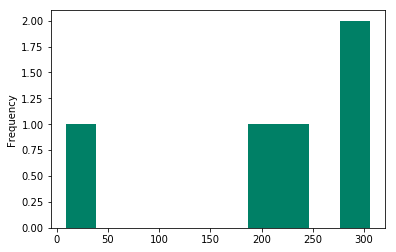

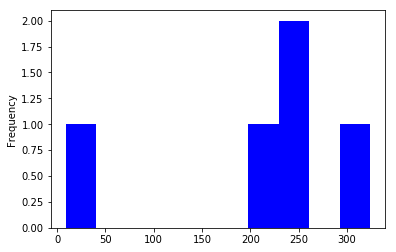

In [15]:
parent_m = dataset.groupby('Medu').size()
parent_f = dataset.groupby('Fedu').size()

parent_m.plot(kind = 'hist', colormap = 'summer')
plt.show()

parent_f.plot(kind = 'hist', colormap = 'winter')
plt.show()

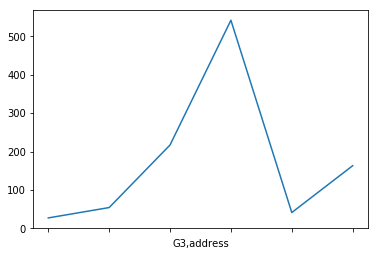

In [16]:
dataset['G3'].groupby([dataset['G3'], dataset['address']]).count().plot()
plt.show()

## Punto 2.1

In [17]:
numeric = pd.DataFrame()

for column in dataset.columns:
    if dataset[column].dtypes != 'object':
        numeric = pd.concat([numeric, dataset[column]], axis = 1)
        
numeric.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GRate
0,18,1,4,4,2,2,0,1,0,0,...,3,4,1,1,3,6,0,0,0,0
1,17,1,1,1,1,2,0,0,1,0,...,3,3,1,1,3,4,0,0,0,0
2,15,0,1,1,1,2,3,1,0,1,...,3,2,2,3,3,10,1,1,1,0
3,15,1,4,2,1,3,0,0,1,1,...,2,2,1,1,5,2,2,1,2,-1
4,16,1,3,3,1,2,0,0,1,1,...,3,2,1,2,5,4,0,1,1,1


In [18]:
reduced = dataset[['G1', 'G2', 'G3']]
reduced.head()

,G1,G2,G3
0,0,0,0
1,0,0,0
2,1,1,1
3,2,1,2
4,0,1,1


In [19]:
lessreduced = numeric.drop(['G1', 'G2'], axis = 1)
lessreduced.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GRate
0,18,1,4,4,2,2,0,1,0,0,...,0,4,3,4,1,1,3,6,0,0
1,17,1,1,1,1,2,0,0,1,0,...,0,5,3,3,1,1,3,4,0,0
2,15,0,1,1,1,2,3,1,0,1,...,0,4,3,2,2,3,3,10,1,0
3,15,1,4,2,1,3,0,0,1,1,...,1,3,2,2,1,1,5,2,2,-1
4,16,1,3,3,1,2,0,0,1,1,...,0,4,3,2,1,2,5,4,1,1


In [47]:
random_state = 92
size = 0.33

df_array = []
df_array.append(('REDUCED', reduced))
df_array.append(('LESSREDUCED', lessreduced))
df_array.append(('NUMERIC', numeric))


train_test = []
scores = []
confusion_matrix = []
for name, df in df_array:
    logistic_regression = LogisticRegression()
    train_temp, test_temp = train_test_split(df, test_size = size, random_state = random_state)
    train_test.append((name, train_temp, test_temp))
    
    X_train = train_temp.drop('G3', axis = 1)
    X_test = test_temp.drop('G3', axis = 1)
    Y_train = train_temp['G3']
    Y_test = test_temp['G3']
    
    logistic_regression.fit(X_train, Y_train)
    
    # Accuracy
    score = logistic_regression.score(X_test, Y_test)
    scores.append((name, score))
    print('Accuracy {}: {:0.2f}% '.format(name, score * 100.0))
    
    # Confusion Matrix
    y_pred = logistic_regression.predict(X_test)
    #cm = confusion_matrix(Y_test, y_pred)

Accuracy REDUCED: 88.99% 
Accuracy LESSREDUCED: 72.75% 
Accuracy NUMERIC: 89.28% 


In [35]:
cv = 10
scoring = 'accuracy'

scores = []
for name, df in df_array:
    X = df.drop('G3', axis = 1)
    Y = df['G3']
    model = DecisionTreeClassifier()
    score = cross_val_score(model, X , Y, cv = cv, scoring = scoring)
    print('Accuracy {}: {:0.3f} ({:0.3f})'.format(name, score.mean() * 100.0 , score.std() * 100.0))

Accuracy REDUCED: 90.893 (2.637)
Accuracy LESSREDUCED: 68.659 (4.742)
Accuracy NUMERIC: 83.697 (5.362)


In [36]:
numeric_2 = numeric.copy()

values = [0, 1, 2]
num = 3
numeric_2['age'] = pd.qcut(numeric_2['age'], q = num, labels= values)

X_num2 = numeric_2.drop('G3', axis = 1)
Y_num2 = numeric_2['G3']

score_num2 = cross_val_score(logistic_regression, X, Y, cv = 10, scoring = 'accuracy')
print('Accuracy : {:0.3f} ({:0.3f})'.format(score_num2.mean() * 100.0 , score_num2.std() * 100.0))

Accuracy : 88.688 (3.026)


In [37]:
numeric_dummy = numeric_2.copy()

dummies_age = pd.get_dummies(numeric_dummy['age'])
numeric_dummy = pd.concat([numeric_dummy, dummies_age], axis = 1)
numeric_dummy = numeric_dummy.drop('age', axis = 1)
X_dummy = numeric_dummy.drop('G3', axis = 1)
Y_dummy = numeric_dummy['G3']

scores_dummy = cross_val_score(logistic_regression, X_dummy, Y_dummy, cv = 10, scoring = 'accuracy')
print('Accuracy {:0.3f} ({:0.3f})'.format(scores_dummy.mean() *100.0 , scores_dummy.std() * 100.0))

Accuracy 88.310 (2.359)


In [38]:
numeric_mf = numeric.copy()
dataset['Mjob'].value_counts()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
numeric_mf['Mjob'] = dataset[['Mjob']].apply(label.fit_transform)
numeric_mf['Fjob'] = dataset[['Fjob']].apply(label.fit_transform)

X_mf = numeric_mf.drop('G3', axis = 1)
Y_mf = numeric_mf['G3']

score_mf = cross_val_score(logistic_regression, X_mf, Y_mf, cv = 10, scoring = 'accuracy')
print('Accuracy {:0.3f} ({:0.3f})'.format(score_mf.mean() *100.0 , score_mf.std() * 100.0))

Accuracy 88.882 (2.997)


In [39]:
dataset_GPMS = dataset.copy()

for column in dataset_GPMS.columns:
    if dataset_GPMS[column].dtype == 'object' and column != 'school':
        dataset_GPMS = dataset_GPMS.drop(column, axis = 1)

dataset_GP = dataset_GPMS[dataset_GPMS['school'] == 'GP']
dataset_GP = dataset_GP.drop('school', axis = 1)
dataset_MS = dataset_GPMS[dataset_GPMS['school'] == 'MS']
dataset_MS = dataset_MS.drop('school', axis = 1)



random_state = 12
X_GP = dataset_GP.drop('G3', axis = 1)
Y_GP = dataset_GP['G3']
X_train_GP, X_test_GP, Y_train_GP, Y_test_GP = train_test_split(X_GP, Y_GP, test_size = 0.33, 
                                                                random_state = random_state)

X_MS = dataset_MS.drop('G3', axis = 1)
Y_MS = dataset_MS['G3']
X_train_MS, X_test_MS, Y_train_MS, Y_test_MS = train_test_split(X_MS, Y_MS, test_size = 0.33, 
                                                                random_state = random_state)

tree1 = DecisionTreeClassifier()
tree2 = DecisionTreeClassifier()

tree1.fit(X_train_GP, Y_train_GP)
tree2.fit(X_train_MS, Y_train_MS)

X_test_total = pd.concat([X_test_GP, X_test_MS])
Y_test_total = pd.concat([Y_test_GP, Y_test_MS])

score_GP = tree1.score(X_test_total, Y_test_total)
score_MS = tree2.score(X_test_total, Y_test_total)
print('Accuracy DT con il dataset GP {:0.3f}'.format(score_GP))
print('Accuracy DT con il dataset MS {:0.3f}'.format(score_MS))

Accuracy DT con il dataset GP 0.843
Accuracy DT con il dataset MS 0.849


In [45]:
def norm_ypred(y):
    for i in range(0, len(y)):
        if y[i] < 0 :
             y[i] = 0
        elif y[i] < 2 :
            y[i] = 1
        else :
            y[i] = 2
    return y

for name, train_temp, test_temp in train_test:
    linear_regression = LinearRegression()
    X_linreg = train_temp.drop('G3', axis = 1)
    Y_linreg = train_temp['G3']
    linear_regression.fit(X_linreg, Y_linreg)

    X_test_linreg = test_temp.drop('G3', axis = 1)
    Y_test_linreg = test_temp['G3']
    y_pred_temp = linear_regression.predict(X_test_linreg)
    y_pred_norm = norm_ypred(y_pred_temp)
    accuracy = accuracy_score(Y_test_linreg, y_pred_norm)
    print('Accuracy {}: {:0.3f}'.format(name, accuracy))
    #cm = confusion_matrix(Y_test_linreg, y_pred_norm)
    #print('Confusion matrix {}:\n',cm)

Accuracy REDUCED: 0.846
Accuracy LESSREDUCED: 0.710
Accuracy NUMERIC: 0.820
